In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Training.csv')
test = pd.read_csv('Testing.csv')
output = pd.DataFrame(test.ID)

# 数据检查及处理

In [24]:
train.isna().sum()
#train无空缺值

ID             0
Region         0
Date           0
Weekday        0
Apartment      0
Beds           0
Review         0
Pic Quality    0
Price          0
Accept         0
dtype: int64

In [25]:
test.isna().sum()
#test无空缺值

ID             0
Region         0
Date           0
Weekday        0
Apartment      0
Beds           0
Review         0
Pic Quality    0
Price          0
dtype: int64

In [26]:
train_data.describe()
#ID为不考虑的feature
#region变为特征变量
#Date也可以不考虑
#Weekday变为特征变量
#price需要归一化处理

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,5.495460,182.824300,3.99276,0.801840,1.495760,4.509402,0.750261,316.963436
std,14433.901067,2.862611,105.653134,2.00837,0.398617,0.693189,0.460287,0.193746,92.644791
min,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,3.000000,0.036809,80.000000
25%,12500.750000,3.000000,91.000000,2.00000,1.000000,1.000000,4.306552,0.630497,251.637842
50%,25000.500000,5.000000,183.000000,4.00000,1.000000,1.000000,4.652005,0.794165,315.334386
75%,37500.250000,8.000000,274.000000,6.00000,1.000000,2.000000,4.855238,0.908876,378.920370
max,50000.000000,10.000000,365.000000,7.00000,1.000000,4.000000,4.999996,0.999985,726.527643


(array([ 1303.,  4836., 10512., 13228., 11318.,  6104.,  2043.,   524.,
          114.,    18.]),
 array([ 80.        , 144.65276428, 209.30552856, 273.95829284,
        338.61105712, 403.2638214 , 467.91658568, 532.56934996,
        597.22211424, 661.87487852, 726.5276428 ]),
 <a list of 10 Patch objects>)

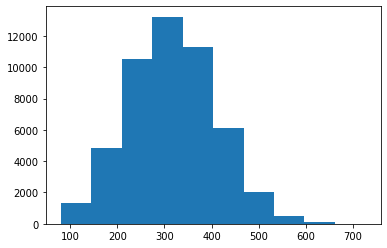

In [27]:
plt.hist(train_data.Price)
#price基本符合正态分布，可以使用正态分布做归一化处理

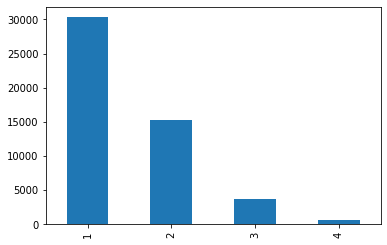

In [92]:
train_data.Beds.value_counts().plot(kind = 'bar')
#Beds上升样本数下降

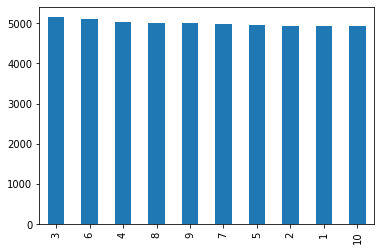

In [93]:
train_data.Region.value_counts().plot(kind = 'bar')
#不同地区样本数基本相同

(array([  119.,   476.,  1149.,  2000.,  3223.,  4635.,  6426.,  8199.,
        10634., 13139.]),
 array([0.03680906, 0.13312664, 0.22944422, 0.3257618 , 0.42207938,
        0.51839695, 0.61471453, 0.71103211, 0.80734969, 0.90366727,
        0.99998484]),
 <a list of 10 Patch objects>)

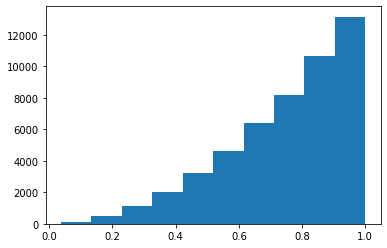

In [94]:
plt.hist(train_data['Pic Quality'])
#pic质量梯度上升，变量为0-1取值的连续变量，所以不用归一化处理

In [16]:
train_data = train.drop(['Accept','ID'],axis = 1)#Accept是目标变量，ID是无关变量，所以在train_data中去除
train_data.Region =train_data.Region.astype('str')
train_data.Weekday =train_data.Weekday.astype('str')#Region 和Weekday应当是类型变量，所以在此处转成字符型
train_data.Price = (train_data.Price - train_data.Price.mean())/train_data.Price.std() #Price的正则化处理
train_data.Review =(train_data.Review -1)/(5-1)
train_label = train.Accept

In [39]:
train_data.head()

,Region,Weekday,Apartment,Beds,Review,Pic Quality,Price
0,4,5,1,1,4.526975,0.739994,-0.932707
1,2,4,1,1,4.548455,0.862642,0.337202
2,5,5,1,2,4.965732,0.515548,1.225097
3,3,2,1,1,4.752735,0.561547,-1.809686
4,1,2,1,2,3.890960,0.817142,-1.637429
...,...,...,...,...,...,...,...
49995,1,6,0,1,3.669174,0.858494,-1.271262
49996,9,1,1,2,4.849890,0.678795,0.345017
49997,10,3,1,2,4.971527,0.993316,0.002414
49998,10,3,1,2,4.951120,0.792698,1.548825


# Naive Bayesian

In [19]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #cross_validation
train_x,test_x,train_y,test_y = train_test_split(train_data,train_label,test_size=0.2) #将train组细分成训练和检验组，检验组组占20%
NB = GaussianNB()
NB.fit(train_x, train_y)#用训练组数据训练模型
y_pred = NB.predict(test_x)#用训练好的模型预测检验组的数据，并和检验组的label进行比对，得出正确率
print("高斯朴素贝叶斯，样本总数： %d 错误样本数 : %d" % (test_x.shape[0],(test_y != y_pred).sum())) #检验组样本总数 vs 检验组中分错样本数
scores = cross_val_score(NB, train_data, train.Accept, cv=5,scoring = 'roc_auc')#5折交叉检验及评分
print("交叉检验AUC评分:",scores)


高斯朴素贝叶斯，样本总数： 10000 错误样本数 : 2702
交叉检验AUC评分: [0.68778154 0.69337426 0.70182254 0.70662962 0.69609557]


# SVM

In [20]:
from sklearn import svm  # svm支持向量机
from sklearn import metrics
from sklearn.model_selection import cross_val_score #cross_validation
train_x,test_x,train_y,test_y = train_test_split(train_data,train_label,test_size=0.2)#把训练集按0.2的比例划分为训练集和验证集
svmmodel = svm.SVC(max_iter =1000) #SVM在这个环境下运行速度过慢甚至不收敛，所以使用max_iter参数
svmmodel.fit(train_x,train_y)
y_pred = svmmodel.predict(test_x)#基于SVM对验证集做出预测
scores = cross_val_score(svmmodel, train_data, train.Accept, cv=5,scoring = 'roc_auc')
print("SVM，样本总数： %d 错误样本数 : %d" % (test_x.shape[0],(test_y != y_pred).sum()))
print("交叉检验AUC评分:",scores)

E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

SVM，样本总数： 10000 错误样本数 : 2729
交叉检验AUC评分: [0.53109258 0.52047205 0.51763365 0.51490489 0.52557965]


# AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
train_x,test_x,train_y,test_y = train_test_split(train_data,train_label,test_size=0.2) #将train组细分成训练和检验组，检验组组占20%
ada = AdaBoostClassifier()
ada.fit(train_x,train_y) #用训练组数据训练模型
y_pred = ada.predict(test_x)#用训练好的模型预测检验组的数据，并和检验组的label进行比对，得出正确率
print("Adaboost，样本总数： %d 错误样本数 : %d" % (test_x.shape[0],(test_y != y_pred).sum()))
scores = cross_val_score(ada, train_data, train.Accept, cv=5,scoring = 'roc_auc')
print("交叉检验AUC评分:",scores)


Adaboost，样本总数： 10000 错误样本数 : 2643
交叉检验AUC评分: [0.77779748 0.78104493 0.79581899 0.78823521 0.77905433]


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
train_x,test_x,train_y,test_y = train_test_split(train_data,train_label,test_size=0.2) #将train组细分成训练和检验组，检验组组占20%
log = LogisticRegression()
log.fit(train_x,train_y) #用训练组数据训练模型
y_pred = log.predict(test_x)#用训练好的模型预测检验组的数据，并和检验组的label进行比对，得出正确率
print("Adaboost，样本总数： %d 错误样本数 : %d" % (test_x.shape[0],(test_y != y_pred).sum()))
scores = cross_val_score(log, train_data, train.Accept, cv=5,scoring = 'roc_auc')
print("交叉检验AUC评分:",scores)

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Adaboost，样本总数： 10000 错误样本数 : 2594


E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


交叉检验AUC评分: [0.76393785 0.77239447 0.78170819 0.77188843 0.77000549]


In [ ]:
#尝试以logisticRegression为弱分类器构建adaboost强分类器

log = LogisticRegression()
ada = AdaBoostClassifier(base_estimator = log)
ada.fit(train_x,train_y) #用训练组数据训练模型
y_pred = ada.predict(test_x)#用训练好的模型预测检验组的数据，并和检验组的label进行比对，得出正确率
print("Adaboost，样本总数： %d 错误样本数 : %d" % (test_x.shape[0],(test_y != y_pred).sum()))
scores = cross_val_score(ada, train_data, train.Accept, cv=5,scoring = 'roc_auc')
print("交叉检验AUC评分:",scores)
#效果不如cart为弱分类器

# 选择adaboost弱分类器数量

In [64]:
#选择最合适的迭代次数，目标函数是AUC
auc = []
for i in range(20,320,20):
    ada = AdaBoostClassifier(n_estimators = i)
    scores_auc = cross_val_score(ada, train_data, train.Accept, cv=5,scoring = 'roc_auc') 
    auc.append([i,scores_auc.mean()])
    print(i,"AUC:",scores_auc.mean())

20 AUC: 0.7641282876067356
40 AUC: 0.7812982615543709
60 AUC: 0.7864128129213711
80 AUC: 0.7886671609913167
100 AUC: 0.7891544731154733
120 AUC: 0.789889273656185
140 AUC: 0.790317264027548
160 AUC: 0.7902934813803786
180 AUC: 0.7904004004777558
200 AUC: 0.7903909105647802
220 AUC: 0.7906073888871685
240 AUC: 0.7904707083324738
260 AUC: 0.7903951242240947
280 AUC: 0.7902967248858457
300 AUC: 0.7902665955330528


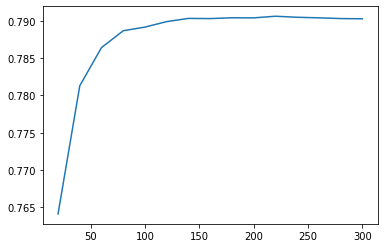

In [80]:
p = np.array(auc)
plt.plot(p[:,0],p[:,1])
#选用200个弱分类器

In [81]:
#构建adaboost模型
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [82]:
#相同方式处理test数据集
test.set_index('ID')
test_data = train.drop(['Accept','ID'],axis = 1)
test_data.Region =test_data.Region.astype('str')
test_data.Weekday =test_data.Weekday.astype('str')
test_data.Price = (test_data.Price - test_data.Price.mean())/test_data.Price.std()

In [84]:
Probability = ada.predict_proba(test_data)
output['probability'] = pd.DataFrame(Probability[:,1])

In [85]:
output.to_csv('result.csv',index = False)